In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

from sklearn.preprocessing import MinMaxScaler

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'D:\DataSets\Google Stock Price Prediction\trainset.csv')
test = pd.read_csv(r'D:\DataSets\Google Stock Price Prediction\testset.csv')

In [3]:
train.shape,test.shape

((1259, 7), (125, 7))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


### Hyperparameters

In [6]:
metric = 'Open' # What matric to model and predict
timestamp = 64 # Maximum number of timestamps to learn from
layers = 3 # Number of layers in LSTM
neurons = 264 # Number of neurons in each layer
epochs = 64 # Number of times the entire data needs to be looped upon
batch_size = 16 # Weights updated after n rows
validation_split = 0.1 # Percentage of data to validate the model when training
dropout = 0.2 # Regularisation parameter
optimizer = 'adam' 
loss = 'mean_squared_error'

In [7]:
loc = train.columns.get_loc(metric)
train_data = train.iloc[:,loc:loc + 1].values

In [8]:
train_data

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [9]:
sc = MinMaxScaler(feature_range = (0,1))

train_data = sc.fit_transform(train_data)

In [10]:
train_x = []
train_y = []
for i in range(0, len(train_data) - timestamp - 1):
    train_x.append(train_data[i : i + timestamp, 0])
    train_y.append(train_data[i + timestamp, 0])
train_x, train_y = np.array(train_x), np.array(train_y)

In [11]:
train_x, train_y

(array([[0.01011148, 0.01388614, 0.01690727, ..., 0.06842378, 0.07453452,
         0.0682251 ],
        [0.01388614, 0.01690727, 0.02109298, ..., 0.07453452, 0.0682251 ,
         0.05576386],
        [0.01690727, 0.02109298, 0.02115463, ..., 0.0682251 , 0.05576386,
         0.05075608],
        ...,
        [0.79349015, 0.79110436, 0.7966481 , ..., 0.99528382, 0.98586493,
         0.9805695 ],
        [0.79110436, 0.7966481 , 0.8154305 , ..., 0.98586493, 0.9805695 ,
         0.97637719],
        [0.7966481 , 0.8154305 , 0.83010341, ..., 0.9805695 , 0.97637719,
         0.97543954]]),
 array([0.05576386, 0.05075608, 0.04852963, ..., 0.97637719, 0.97543954,
        0.9674549 ]))

In [12]:
train_x.shape,train_y.shape

((1194, 64), (1194,))

In [13]:
train_x = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))
train_x.shape

(1194, 64, 1)

In [15]:
regressor = Sequential()
regressor.add(LSTM(neurons, return_sequences = True, input_shape = (train_x.shape[1],1)))
regressor.add(Dropout(dropout))

if layers > 2:
    for i in range(2,layers):
        regressor.add(LSTM(neurons, return_sequences = True))
        regressor.add(Dropout(dropout))

regressor.add(LSTM(neurons))
regressor.add(Dropout(dropout))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = optimizer,loss = loss,metrics=['accuracy'])

In [ ]:
regressor.summary()

In [16]:
regressor.fit(train_x,train_y,epochs = 20, batch_size = batch_size, validation_split = validation_split)

Epoch 1/20
68/68 [==============================] - 38s 470ms/step - loss: 0.0157 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0083
Epoch 2/20
68/68 [==============================] - 30s 443ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0083
Epoch 3/20
68/68 [==============================] - 30s 437ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0083
Epoch 4/20
68/68 [==============================] - 28s 412ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 9.5770e-04 - val_accuracy: 0.0083
Epoch 5/20
68/68 [==============================] - 30s 445ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 9.0551e-04 - val_accuracy: 0.0083
Epoch 6/20
68/68 [==============================] - 34s 497ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 6.1417e-04 - val_accuracy: 0.0083
Epoch 7/20
68/68 [==============================] - 31s 458ms/step - loss: 0.0012 - accuracy: 0.0000e+00 -

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

In [17]:
test_data = pd.concat((train[len(train) - timestamp:][metric], test[metric]), axis = 0)
test_data = test_data.values
test_data = test_data.reshape(-1,1)

In [18]:
test_data = sc.transform(test_data)

In [19]:
test_x = []
test_y = []
for i in range(0, len(test_data) - timestamp - 1):
    test_x.append(test_data[i : i + timestamp, 0])
    test_y.append(test_data[i + timestamp, 0])
test_x, test_y = np.array(test_x), np.array(test_y)

In [20]:
test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1],1))

In [21]:
predicted_price = sc.inverse_transform(regressor.predict(test_x))
real_stock_price = test[metric]

4/4 [==============================] - 2s 189ms/step


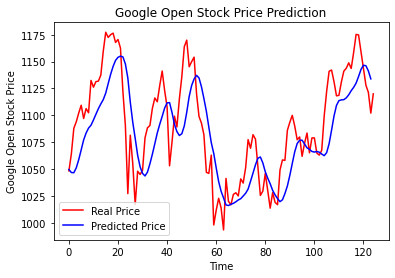

In [22]:
def plot_pred(metric, real_stock_price, predicted_price):
    plt.plot(real_stock_price,color = 'red', label = 'Real Price')
    plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
    plt.title('Google ' +metric+ ' Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google ' +metric+ ' Stock Price')
    plt.legend()
    plt.show()

plot_pred(metric, real_stock_price, predicted_price)